# Обязательная часть

Вам необходимо провести базовый EDA выбранного набора данных.

Требования к анализу:

- построить не менее 4 визуализаций различных видов;
- каждая визуализация должным образом оформлена и читается даже в отрыве от контекста;
- по каждой визуализации необходимо написать вывод (какую гипотезу на ее основе можно выдвинуть?).

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Для работы возьмем датасет со статистикой Google Play (https://www.kaggle.com/lava18/google-play-store-apps)

In [2]:
df_google_play = pd.read_csv('googleplaystore.csv', encoding='utf-8')
# Переведем статистику обзоров на приложение в числовой формат
df_google_play.Reviews = df_google_play.Reviews.apply(lambda x: int(x) 
                                                                if 'M' not in x 
                                                                else int(float(x.replace('M', '').strip())*1000000))
# Переведем статистику установок в числовой формат
df_google_play.Installs = df_google_play.Installs.apply(lambda x: int(x.replace(',','').replace('+', ''))
                                                                  if x.lower() != 'free' 
                                                                  else 0)
# Переведем дату последнего обновления в формат datetime
df_google_play['Last Updated'] = pd.to_datetime(df_google_play['Last Updated'], format='%B %d, %Y', errors='coerce')
# Удаляем строку с некорректной категорией 1.9, там всего одна строка, на итоговый анализ не должно повлиять
df_google_play.drop(df_google_play[df_google_play.Category == '1.9'].index, inplace=True)
df_google_play[:5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up


In [3]:
# Читаем таблицу с отзывами по каждому приложению
df_google_play_reviews = pd.read_csv('googleplaystore_user_reviews.csv', encoding='utf-8')

# Составим сводную таблицу, индекс - название приложения, а колонки - количество позитивных, негативных
# или нейтральных отзывов
df_google_play_sentiments = df_google_play_reviews.dropna(subset=['Sentiment']).pivot_table(index='App', 
                                                                                            columns='Sentiment', 
                                                                                            aggfunc='count', 
                                                                                            values='Sentiment_Polarity')
df_google_play_sentiments[:5]

Sentiment,Negative,Neutral,Positive
App,,,
10 Best Foods for You,10.0,22.0,162.0
104 找工作 - 找工作 找打工 找兼職 履歷健檢 履歷診療室,1.0,8.0,31.0
11st,7.0,10.0,23.0
1800 Contacts - Lens Store,6.0,10.0,64.0
1LINE – One Line with One Touch,8.0,3.0,27.0


In [4]:
# Объединим датафрейм df_google_play со статистикой отзывов
df_google_play = df_google_play.merge(df_google_play_sentiments, how='left', left_on='App', right_index=True)
df_google_play[:5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Negative,Neutral,Positive
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,NaN,NaN,NaN
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,14.0,4.0,26.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,NaN,NaN,NaN
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,NaN,NaN,NaN
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,NaN,NaN,NaN


Посмотрим какие категории приложений скачиваются чаще всего

Text(0.5, 1.0, 'Статистика загрузок приложений по категориям')

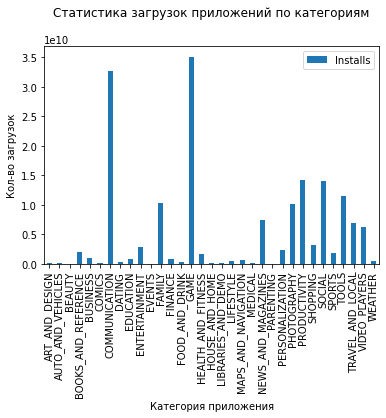

In [5]:
ax = df_google_play[['Category', 'Installs']].groupby(by='Category').sum().plot(
    kind='bar',
    xlabel='Категория приложения' ,
    ylabel='Кол-во загрузок'
)
plt.title('Статистика загрузок приложений по категориям', pad=30)

Как видно наиболее загружаемые категории приложений - Communication и Games.

Проверим как зависит количество загрузок от рейтинга приложения.

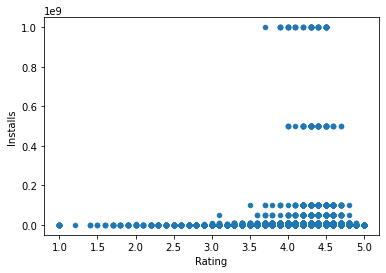

In [6]:
ax = df_google_play.plot(
    kind='scatter',
    x='Rating',
    y='Installs'
)

Как видно из точечной диаграммы, больше всего загружают приложения с рейтингом от 3.5 и выше.

Построим "ящики с усами" для ТОП-5 категорий и оценок по ним.

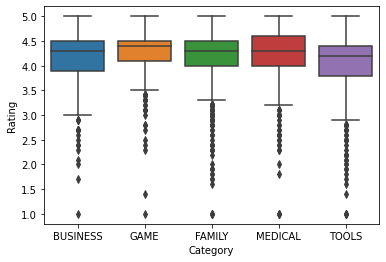

In [7]:
top_app_category = df_google_play.Category.value_counts().sort_values(ascending=False).head(5).index.values
sns.boxplot(x='Category', y='Rating', data=df_google_play[df_google_play.Category.isin(top_app_category)])

Как видно из графиков категория Game имеет в целом наиболее высшие оценки, так как длина уса в сторону уменьшения оценки самая маленькая.

Построим гистрограмму по всем значениям оценок и проверим какие оценки ставят чаще всего.

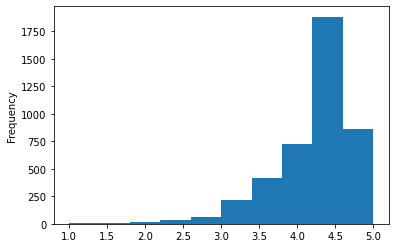

In [8]:
df_google_play[df_google_play.Category.isin(top_app_category)]['Rating'].plot(kind='hist')

Как видно из гистрограммы люди в целом ставят оценки от 3.5 и выше.

Посмотрим сводную таблицу с суммой негативных нейтральных и позитивных комментариев для каждой категории и построим тепловую карту.

In [9]:
df_category_tonality = df_google_play.pivot_table(index='Category', 
                                                  values=['Negative', 'Neutral', 'Positive'], aggfunc='sum')
df_category_tonality

,Negative,Neutral,Positive
Category,,,
ART_AND_DESIGN,61.0,62.0,259.0
AUTO_AND_VEHICLES,17.0,36.0,236.0
BEAUTY,65.0,88.0,185.0
BOOKS_AND_REFERENCE,134.0,130.0,551.0
BUSINESS,342.0,555.0,1450.0
COMICS,2.0,8.0,72.0
COMMUNICATION,372.0,285.0,1292.0
DATING,697.0,530.0,1971.0
EDUCATION,216.0,132.0,1346.0


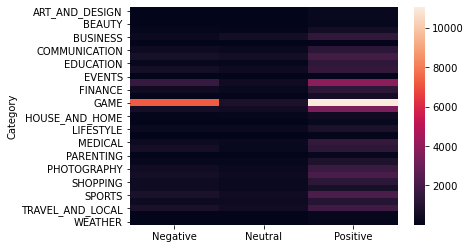

In [10]:
sns.heatmap(df_category_tonality)

Из тепловой карты видно, что самая обсуждаемая в отзывах категория - категория Game, имеет больше всего положительных отзывов, а так не очень много негативных отзывов. Так же видно, что пользователи в целом любят писать либо положительные отзывы, либо отрицательные. Нейтральные встречаются очень редко. Возможно такая картина из-за недостаточности данных.

Попробуем посмотреть как зависит количество комментариев по эмоциональной окраске в зависимости от рейтинга.

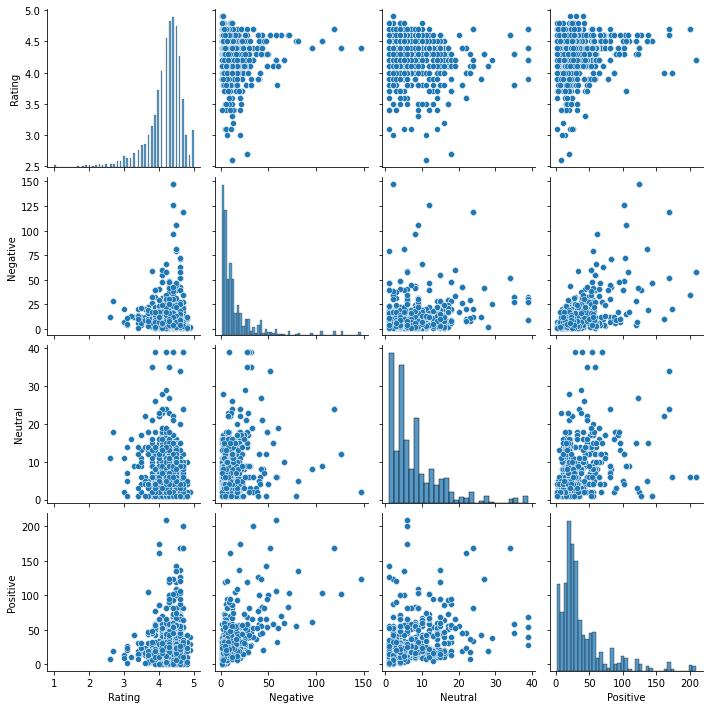

In [11]:
sns.pairplot(df_google_play[['Rating', 'Negative', 'Neutral', 'Positive']])

Как видно из полученных графиков люди предпочитают оставлять как позитивные, как негативные комментарии при выставлении рейтинга более 3.

Аналогичный график можно построить с помощью pandas.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000013FAA8147F0>,
      dtype=object)

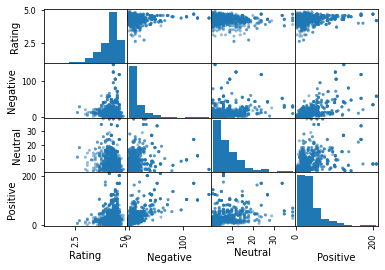

In [12]:
pd.plotting.scatter_matrix(df_google_play[['Rating', 'Negative', 'Neutral', 'Positive']])